# Prep

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./jobs.csv')

In [3]:
df.head()

,title,money,knoladge,company,addition,city,link
0,Python разработчик (Middle),200.0,AIOHTTP STARLETTE FASTAPI FASTAPI PYTHON LINUX...,Технопарк «Сколково»,['Удаленная работа'],Москва,https://russia.superjob.ru/vacancy/search/?key...
1,Python-разработчик с функционалом data-аналитика,NaN,PYTHON DJANGO,Friendwork,NaN,Москва,https://russia.superjob.ru/vacancy/search/?key...
2,Разработчик Python,180.0,PYTHON DRF FASTAPI CELERY,Ботобот,['Удаленная работа'],Москва,https://russia.superjob.ru/vacancy/search/?key...
3,Программист Python,NaN,LINUX CENTOS OPENSUSE,"ФГБУ ""Научно-исследовательский центр космическ...",['Доступно студентам'],Москва,https://russia.superjob.ru/vacancy/search/?key...
4,Педагог дополнительного образования (программи...,18.0,NaN,ТЕХНОШКОЛА,['Доступно студентам'],Домодедово,https://russia.superjob.ru/vacancy/search/?key...


In [4]:
df = df.drop(['title', 'company', 'link'], axis=1)

In [5]:
some = []
for i, j in enumerate(df.knoladge):
    some.append({})
    if type(j) == float:
        continue
    for k in j.split(' '):
        some[i][k] = 1



In [6]:
some = pd.DataFrame(some).fillna(0)

In [7]:
df

,money,knoladge,addition,city
0,200.0,AIOHTTP STARLETTE FASTAPI FASTAPI PYTHON LINUX...,['Удаленная работа'],Москва
1,NaN,PYTHON DJANGO,NaN,Москва
2,180.0,PYTHON DRF FASTAPI CELERY,['Удаленная работа'],Москва
3,NaN,LINUX CENTOS OPENSUSE,['Доступно студентам'],Москва
4,18.0,NaN,['Доступно студентам'],Домодедово
...,...,...,...,...
136,NaN,NET HTML JAVASCRIPT ASP NET,['Удаленная работа'],Москва
137,NaN,GEMS DEVELOPMENT NPM YARN NUGET JAVASCRIPT ANG...,NaN,Омск
138,NaN,ANGULAR JS TYPESCRIPT POSTGRESQL SEQUELIZE EXP...,['Удаленная работа'],Москва
139,40.0,WINDOWS SERVER CENTOS POSTRESQL NODE JS NGINX ...,NaN,Сыктывкар


In [8]:
df = pd.concat([df, some], axis=1).drop('knoladge', axis=1)

In [9]:
df.isnull().sum()[df.isnull().sum() > 1]

money       57
addition    77
dtype: int64

In [10]:
df[df.money > 0].shape, df.shape

((84, 250), (141, 250))

In [11]:
df = df[df.money > 0]

# Almost work

In [12]:
df = pd.get_dummies(df)
df.head()

,money,AIOHTTP,STARLETTE,FASTAPI,PYTHON,LINUX,POSTGRESQL,ASYNCPGSQLALCHEMY,DJANGO,DRF,...,city_Ногинск,city_Пенза,city_Пермь,city_Подольск,city_Ростов-на-Дону,city_Санкт-Петербург,city_Сыктывкар,city_Тольятти,city_Хабаровск,city_Ярославль
0,200.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,180.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
5,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
9,15.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False


In [13]:
data = np.zeros([1, 280])
pd.DataFrame(data, columns=df.columns).to_csv('columns.csv')

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('money', axis=1)
y = df['money']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

def fitt(model, out=True):
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    mae = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

    if out:
        print('score:', score)
        print('mae: ', mae)
        print('std: 60')

    return score, mae

fitt(model);

score: -2.038572703657041
mae:  56.40543579252976
std: 60


In [17]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

fitt(model);

score: -1.5886195349714662
mae:  52.061928935110004
std: 60


In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=15)

fitt(model);

score: -0.009824109795783409
mae:  32.516890653593826
std: 60


In [19]:
r = range(100, 1001, 100)
y = []
for i in r:
    model = RandomForestRegressor(random_state=15, n_estimators=i)
    _, mse = fitt(model, False)

    y.append(mse)

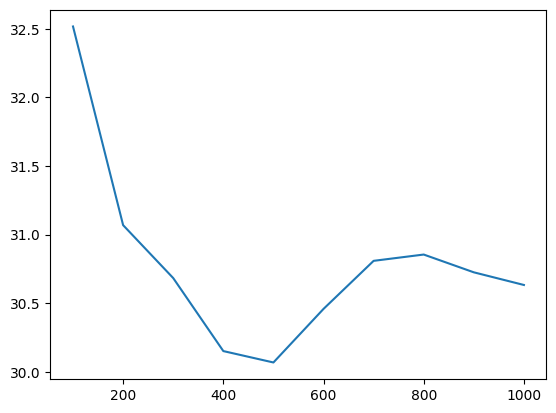

In [20]:
import matplotlib.pyplot as plt

plt.plot(r, y);

Here we see, that 500 is the best number of trees. But then i remember that we can use random search cv

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [23]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\nnurs\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nnurs\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\nnurs\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\

,estimator,RandomForestRegressor()
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [10, 20, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,100
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [24]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [25]:
tree = rf_random.best_estimator_

In [26]:
fitt(tree);

score: 0.5571413216729999
mae:  21.533703192062006
std: 60


In [27]:
model.score(X_train, y_train)

0.9053623815414431

In [28]:
tree.score(X_train, y_train)

0.9604203118277027

In [29]:
rf = RandomForestRegressor(random_state=15, n_estimators=500)
fitt(rf);

score: 0.1365271388246948
mae:  30.06841177123335
std: 60


# End

So look, overall my version is much better covinsionaly.

In [30]:
import joblib

filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']